In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [58]:
path_census="2016 merged census data.csv"
path_crime="2016 Austin crime data - clean.csv"
path_all_rank="../Analysis/Output/all_ranks_by_zip.csv"
path_poverty_level="../Analysis/Output/people_poverty_level_rank_by_zip.csv"
path_edu_level="../Analysis/Output/edu_rank_by_zip.csv"

In [59]:
df_census=pd.read_csv(path_census)
df_crime=pd.read_csv(path_crime)
df_all_ranks=pd.read_csv(path_all_rank)
df_poverty_level=pd.read_csv(path_poverty_level)
df_edu_level=pd.read_csv(path_edu_level)
df_edu_level.head()

,Zip Code,EDU Total Score,EDU Rank
0,78701,3.583404,24.0
1,78702,2.694384,7.0
2,78703,3.756616,28.0
3,78704,3.346330,15.0
4,78705,3.080867,11.0


In [ ]:
df_census.head(10)

In [ ]:
df_crime.head()

In [16]:
df_crime_sensus = pd.merge(df_census,df_crime, how="left", on=["Zip Code","Zip Code"])

In [ ]:
df_crime_sensus.columns

In [17]:
total_crimes_by_zip = df_crime_sensus.groupby(['Zip Code','Highest Offense Description'],as_index=False).agg({"Highest Offense Code":"count"})
#print(total_crimes_by_zip)
tot_pop_18_24 = df_census.set_index('Zip Code')["HC01_EST_VC02"].to_dict()

#Dict Percent High School 
tot_pop_hs = df_census.set_index('Zip Code')["HC02_EST_VC17"].to_dict()
#Dict Percent Bachelor's degree
tot_pop_ba = df_census.set_index('Zip Code')["HC02_EST_VC18"].to_dict()
#print(tot_pop_hs)
#print(tot_pop_ba)
#Dict population 18-24 years old
tot_pop_18_24 = df_census.set_index('Zip Code')["HC01_EST_VC02"].to_dict()
#Dict population 25 years and over
tot_pop_25_over = df_census.set_index('Zip Code')["HC01_EST_VC08"].to_dict()
#Convert Dict HS to Dataframe
tot_pop_hs_df = pd.Series(tot_pop_hs,name='Per_hs')
tot_pop_hs_df.index.name = 'Zip Code'
tot_pop_hs_df.reset_index()
#Convert Dict BA to Dataframe
tot_pop_ba_df = pd.Series(tot_pop_ba,name='Per_ba')
tot_pop_ba_df.index.name = 'Zip Code'
tot_pop_ba_df.reset_index()
#Convert Dict 18_24 years to Dataframe
tot_pop_18_24_df = pd.Series(tot_pop_18_24,name='Pop_18_24')
tot_pop_18_24_df.index.name = 'Zip Code'
tot_pop_18_24_df.reset_index()
#Convert Dict 25 years and over to Dataframe
tot_pop_25_over_df = pd.Series(tot_pop_25_over,name='Pop_25_over')
tot_pop_25_over_df.index.name = 'Zip Code'
tot_pop_25_over_df.reset_index()

,Zip Code,Pop_25_over
0,78701,6570
1,78702,16244
2,78703,15824
3,78704,34620
4,78705,6641
5,78721,8221
6,78722,5587
7,78723,21523
8,78727,21677
9,78730,6549


In [ ]:
total_crimes_by_zip.head()


In [18]:
#Merge
tot_per_hs_df      = pd.DataFrame(tot_pop_hs_df)
tot_per_ba_df      = pd.DataFrame(tot_pop_ba_df)
tot_pop_18_24_df   = pd.DataFrame(tot_pop_18_24_df)
tot_pop_25_over_df = pd.DataFrame(tot_pop_25_over_df)
school_census_crime_df = pd.merge(tot_per_hs_df,tot_per_ba_df,on='Zip Code')
pop_census_df = pd.merge(tot_pop_18_24_df,tot_pop_25_over_df,on='Zip Code')

crime_type_census_school_df = pd.merge(total_crimes_by_zip,school_census_crime_df,on='Zip Code')
crime_type_census_school_df.rename(columns={'Highest Offense Code':'Cnt_crime'},inplace=True)
crime_type_census_school_df.rename(columns={'Highest Offense Description':'Description'},inplace=True)
crime_type_census_school_df.rename(columns={'Per_hs':'HighSchool%'},inplace=True)
crime_type_census_school_df.rename(columns={'Per_ba':'Bachelor%'},inplace=True)
tot_population_census_crime_df = pd.merge(crime_type_census_school_df,pop_census_df,on='Zip Code')
tot_population_census_crime_df = tot_population_census_crime_df.groupby(['Zip Code','HighSchool%','Bachelor%','Pop_18_24','Pop_25_over','Description'],as_index=True).agg({"Cnt_crime":"sum"})
#crime_type_census_school_df.head(100)

In [ ]:
#tot_population_census_crime_df = tot_population_census_crime_df.style.format({'HighSchool%':"{:.6}%",
#                                                                               'Bachelor%':"{:.6}%",
#                                                                               'Pop_18_24': "${:,}",
#                                                                               'Pop_25_over': "${:,}"
#                                                                               'Cnt_crime': "${:,}"})
tot_population_census_crime_df.head(40)

In [19]:
tot_population_census_crime_df.to_csv("Tot_population_educational_crime.csv",index=True,header=True)

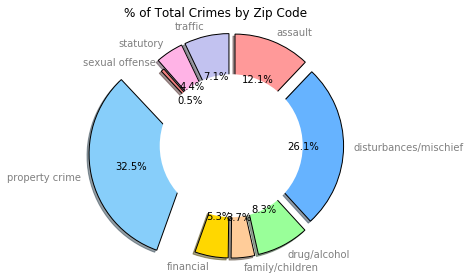

In [20]:
colors = ["#E13F29", "#D69A80", "#D63B59", "#AE5552", "#CB5C3B", "#EB8076", "#96624E"]
#group by Crime to be used by all pie charts
by_type = total_crimes_by_zip.groupby('Highest Offense Description')['Highest Offense Description', 'Highest Offense Code']

#total fare by city
crime_sum = by_type.sum()['Highest Offense Code']


#pie chart build
labels = crime_sum.index

#colors and exploe the same for all pie charts, reference here
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#FFD700','#87CEFA','#F08080','#ffb3e6','#c2c2f0','#ffb3e6']
explode = [0.1 , 0.1,0.1,0.1,0.1,0.4,0,0.1,0.1]
#plt.pie(crime_sum, startangle = 90,explode = explode,labels = labels, autopct = "%1.1f%%", 
#        counterclock=False,shadow = True, wedgeprops = {'linewidth': 1, 'edgecolor': 'black'})

fig1, ax1 = plt.subplots()
patches, texts, autotexts = ax1.pie(crime_sum, startangle = 90,colors = colors,explode = explode,labels = labels, autopct = "%1.1f%%", 
        counterclock=False,shadow = True, wedgeprops = {'linewidth': 1, 'edgecolor': 'black'})
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

for text in texts:
    text.set_color('grey')
for autotext in autotexts:
    autotext.set_color('black')

#pie chart display
plt.title('% of Total Crimes by Zip Code')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [67]:
# Calculate educational attainment rates
census_df = df_census
total_pop = census_df['HC01_EST_VC02'] + census_df['HC01_EST_VC08']
less_than_hs = census_df['HC01_EST_VC03'] + census_df['HC01_EST_VC09'] + census_df['HC01_EST_VC10']
hs_grad = census_df['HC01_EST_VC04'] + census_df['HC01_EST_VC11']
some_college = census_df['HC01_EST_VC05'] + census_df['HC01_EST_VC12'] + census_df['HC01_EST_VC13']
bachelor = census_df['HC01_EST_VC06'] + census_df['HC01_EST_VC14'] + census_df['HC01_EST_VC15']
edu_att = census_df ['Zip Code']
edu_df= pd.concat([edu_att,total_pop,less_than_hs,hs_grad,some_college,bachelor],axis=1)
edu_df.columns = ['Zip Code','Total Population (18+)','Less than HS Graduate', 'HS Graduate', 'Some College or Associates Degree', 'Bachelors Degree or Higher']
less_than_hs_rate = round(edu_df['Less than HS Graduate']/edu_df['Total Population (18+)']*100,2)
hs_grad_rate = round(edu_df['HS Graduate']/edu_df['Total Population (18+)']*100,2)
some_college_rate = round(edu_df['Some College or Associates Degree']/edu_df['Total Population (18+)']*100,2)
bachelor_rate = round(edu_df['Bachelors Degree or Higher']/edu_df['Total Population (18+)']*100,2)
edu_rates = pd.concat([edu_att,less_than_hs_rate,hs_grad_rate,some_college_rate,bachelor_rate],axis=1)
edu_rates.columns = ['Zip Code','Less than HS Graduate %', 'HS Graduate %', 'Some College %', 'Bachelors Degree or Higher %']
#edu_rates.style.format({
 #   'Less than HS Graduate %': '{:,.2%}'.format,
  #  'HS Graduate %': '{:,.2%}'.format,
   # 'Some College %': '{:,.2%}'.format,
   # 'Bachelors Degree or Higher %' : '{:,.2%}'.format})
edu_rates.head(3)
edu_df.head(5)

,Zip Code,Total Population (18+),Less than HS Graduate,HS Graduate,Some College or Associates Degree,Bachelors Degree or Higher
0,78701,7098,299,488,1084,5227
1,78702,18003,3842,4000,3979,6182
2,78703,16739,307,588,1977,13867
3,78704,39370,2476,4266,9775,22853
4,78705,31595,303,3074,21983,6235


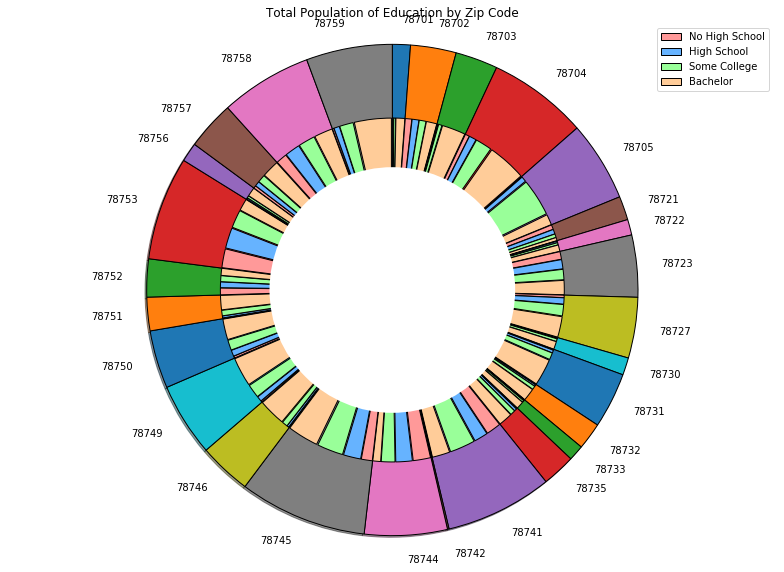

In [68]:
fig, ax = plt.subplots(figsize=(11, 8), subplot_kw=dict(aspect="equal"))
labels = ['No High School','High School','Some College','Bachelor']
labels_zip = edu_rates['Zip Code']
sizes      = edu_df['Total Population (18+)']
labels_edu = ['No HS','HS','Some College','Bachelor','No HS','HS','Some College','Bachelor','No HS','HS','Some College','Bachelor',
             'No HS','HS','Some College','Bachelor','No HS','HS','Some College','Bachelor','No HS','HS','Some College','Bachelor',
             'No HS','HS','Some College','Bachelor','No HS','HS','Some College','Bachelor','No HS','HS','Some College','Bachelor',
             'No HS','HS','Some College','Bachelor','No HS','HS','Some College','Bachelor','No HS','HS','Some College','Bachelor',
             'No HS','HS','Some College','Bachelor','No HS','HS','Some College','Bachelor','No HS','HS','Some College','Bachelor',
             'No HS','HS','Some College','Bachelor','No HS','HS','Some College','Bachelor','No HS','HS','Some College','Bachelor',
             'No HS','HS','Some College','Bachelor','No HS','HS','Some College','Bachelor','No HS','HS','Some College','Bachelor',
             'No HS','HS','Some College','Bachelor','No HS','HS','Some College','Bachelor','No HS','HS','Some College','Bachelor',
             'No HS','HS','Some College','Bachelor','No HS','HS','Some College','Bachelor','No HS','HS','Some College','Bachelor',
             'No HS','HS','Some College','Bachelor']

sizes_edu = edu_df[['Less than HS Graduate','HS Graduate','Some College or Associates Degree','Bachelors Degree or Higher']]
sizes_edu_l = sizes_edu.values.tolist()
sizes_edu_flat=[]
for sublist in sizes_edu_l:
    for item in sublist:
        sizes_edu_flat.append(item)
colors_edu = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#ff9999','#66b3ff','#99ff99','#ffcc99','#ff9999','#66b3ff','#99ff99','#ffcc99',
             '#ff9999','#66b3ff','#99ff99','#ffcc99','#ff9999','#66b3ff','#99ff99','#ffcc99','#ff9999','#66b3ff','#99ff99','#ffcc99',
             '#ff9999','#66b3ff','#99ff99','#ffcc99','#ff9999','#66b3ff','#99ff99','#ffcc99','#ff9999','#66b3ff','#99ff99','#ffcc99',
             '#ff9999','#66b3ff','#99ff99','#ffcc99','#ff9999','#66b3ff','#99ff99','#ffcc99','#ff9999','#66b3ff','#99ff99','#ffcc99',
             '#ff9999','#66b3ff','#99ff99','#ffcc99','#ff9999','#66b3ff','#99ff99','#ffcc99','#ff9999','#66b3ff','#99ff99','#ffcc99',
             '#ff9999','#66b3ff','#99ff99','#ffcc99','#ff9999','#66b3ff','#99ff99','#ffcc99','#ff9999','#66b3ff','#99ff99','#ffcc99',
             '#ff9999','#66b3ff','#99ff99','#ffcc99','#ff9999','#66b3ff','#99ff99','#ffcc99','#ff9999','#66b3ff','#99ff99','#ffcc99',
             '#ff9999','#66b3ff','#99ff99','#ffcc99','#ff9999','#66b3ff','#99ff99','#ffcc99','#ff9999','#66b3ff','#99ff99','#ffcc99',
             '#ff9999','#66b3ff','#99ff99','#ffcc99','#ff9999','#66b3ff','#99ff99','#ffcc99','#ff9999','#66b3ff','#99ff99','#ffcc99',
             '#ff9999','#66b3ff','#99ff99','#ffcc99']
explode = (0.8,0.5,0.9,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5) 
explode_edu = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,
              0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,
              0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,
              0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,
              0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
#Plot
ax.pie(sizes, labels=labels_zip, startangle=90,frame=False, radius=3, 
        counterclock=False,shadow = True, wedgeprops = {'linewidth': 1, 'edgecolor': 'black'})
patches,texts = plt.pie(sizes_edu_flat,colors=colors_edu,startangle=90, explode=explode_edu,radius=2, 
        counterclock=False,shadow = True, wedgeprops = {'linewidth': 1, 'edgecolor': 'black'} )

plt.legend(patches,labels,loc="best")
#Draw circle
centre_circle = plt.Circle((0,0),1.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Total Population of Education by Zip Code') 
plt.axis('equal')
plt.tight_layout()
plt.show()

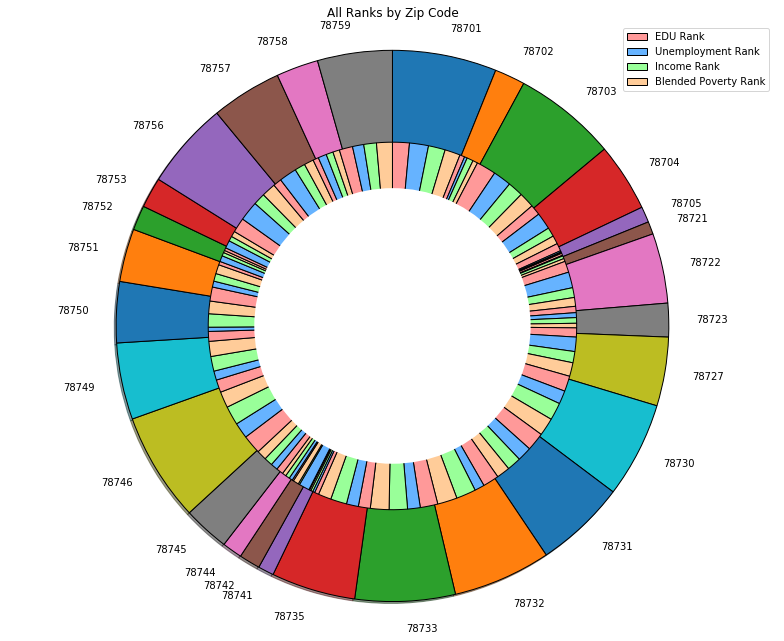

In [5]:
fig, ax = plt.subplots(figsize=(11, 9), subplot_kw=dict(aspect="equal"))
labels = ['EDU Rank','Unemployment Rank','Income Rank','Blended Poverty Rank']
labels_zip = df_all_ranks['Zip Code']
sizes      = df_all_ranks['EDU Rank']+ df_all_ranks['Unemployment Rank'] + df_all_ranks['Income Rank'] + df_all_ranks['Income Rank']
labels_edu = ['EDU Rank','Unemployment Rank','Income Rank','Blended Poverty Rank',
             'EDU Rank','Unemployment Rank','Income Rank','Blended Poverty Rank',
             'EDU Rank','Unemployment Rank','Income Rank','Blended Poverty Rank',
             'EDU Rank','Unemployment Rank','Income Rank','Blended Poverty Rank',
             'EDU Rank','Unemployment Rank','Income Rank','Blended Poverty Rank',
             'EDU Rank','Unemployment Rank','Income Rank','Blended Poverty Rank',
             'EDU Rank','Unemployment Rank','Income Rank','Blended Poverty Rank',
             'EDU Rank','Unemployment Rank','Income Rank','Blended Poverty Rank',
             'EDU Rank','Unemployment Rank','Income Rank','Blended Poverty Rank',
             'EDU Rank','Unemployment Rank','Income Rank','Blended Poverty Rank',
             'EDU Rank','Unemployment Rank','Income Rank','Blended Poverty Rank',
             'EDU Rank','Unemployment Rank','Income Rank','Blended Poverty Rank',
             'EDU Rank','Unemployment Rank','Income Rank','Blended Poverty Rank',
             'EDU Rank','Unemployment Rank','Income Rank','Blended Poverty Rank',
             'EDU Rank','Unemployment Rank','Income Rank','Blended Poverty Rank',
             'EDU Rank','Unemployment Rank','Income Rank','Blended Poverty Rank',
             'EDU Rank','Unemployment Rank','Income Rank','Blended Poverty Rank',
             'EDU Rank','Unemployment Rank','Income Rank','Blended Poverty Rank',
             'EDU Rank','Unemployment Rank','Income Rank','Blended Poverty Rank',
             'EDU Rank','Unemployment Rank','Income Rank','Blended Poverty Rank',
             'EDU Rank','Unemployment Rank','Income Rank','Blended Poverty Rank',
             'EDU Rank','Unemployment Rank','Income Rank','Blended Poverty Rank',
             'EDU Rank','Unemployment Rank','Income Rank','Blended Poverty Rank',
             'EDU Rank','Unemployment Rank','Income Rank','Blended Poverty Rank',
             'EDU Rank','Unemployment Rank','Income Rank','Blended Poverty Rank',
             'EDU Rank','Unemployment Rank','Income Rank','Blended Poverty Rank',
             'EDU Rank','Unemployment Rank','Income Rank','Blended Poverty Rank',
             'EDU Rank','Unemployment Rank','Income Rank','Blended Poverty Rank']

sizes_edu = df_all_ranks[['EDU Rank','Unemployment Rank','Income Rank','Blended Poverty Rank']]
sizes_edu_l = sizes_edu.values.tolist()
sizes_edu_flat=[]
for sublist in sizes_edu_l:
    for item in sublist:
        sizes_edu_flat.append(item)
colors_edu = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#ff9999','#66b3ff','#99ff99','#ffcc99','#ff9999','#66b3ff','#99ff99','#ffcc99',
             '#ff9999','#66b3ff','#99ff99','#ffcc99','#ff9999','#66b3ff','#99ff99','#ffcc99','#ff9999','#66b3ff','#99ff99','#ffcc99',
             '#ff9999','#66b3ff','#99ff99','#ffcc99','#ff9999','#66b3ff','#99ff99','#ffcc99','#ff9999','#66b3ff','#99ff99','#ffcc99',
             '#ff9999','#66b3ff','#99ff99','#ffcc99','#ff9999','#66b3ff','#99ff99','#ffcc99','#ff9999','#66b3ff','#99ff99','#ffcc99',
             '#ff9999','#66b3ff','#99ff99','#ffcc99','#ff9999','#66b3ff','#99ff99','#ffcc99','#ff9999','#66b3ff','#99ff99','#ffcc99',
             '#ff9999','#66b3ff','#99ff99','#ffcc99','#ff9999','#66b3ff','#99ff99','#ffcc99','#ff9999','#66b3ff','#99ff99','#ffcc99',
             '#ff9999','#66b3ff','#99ff99','#ffcc99','#ff9999','#66b3ff','#99ff99','#ffcc99','#ff9999','#66b3ff','#99ff99','#ffcc99',
             '#ff9999','#66b3ff','#99ff99','#ffcc99','#ff9999','#66b3ff','#99ff99','#ffcc99','#ff9999','#66b3ff','#99ff99','#ffcc99',
             '#ff9999','#66b3ff','#99ff99','#ffcc99','#ff9999','#66b3ff','#99ff99','#ffcc99','#ff9999','#66b3ff','#99ff99','#ffcc99',
             '#ff9999','#66b3ff','#99ff99','#ffcc99']
explode = (0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5) 
explode_edu = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,
              0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,
              0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,
              0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,
              0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
#Plot
ax.pie(sizes, labels=labels_zip, startangle=90,frame=False, radius=3, 
        counterclock=False,shadow = True, wedgeprops = {'linewidth': 1, 'edgecolor': 'black'})
patches,texts = plt.pie(sizes_edu_flat,colors=colors_edu,startangle=90, radius=2, 
        counterclock=False,shadow = True, wedgeprops = {'linewidth': 1, 'edgecolor': 'black'} )

plt.legend(patches,labels,loc="best")
#Draw circle
centre_circle = plt.Circle((0,0),1.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('All Ranks by Zip Code') 
plt.axis('equal')
plt.tight_layout()
plt.show()

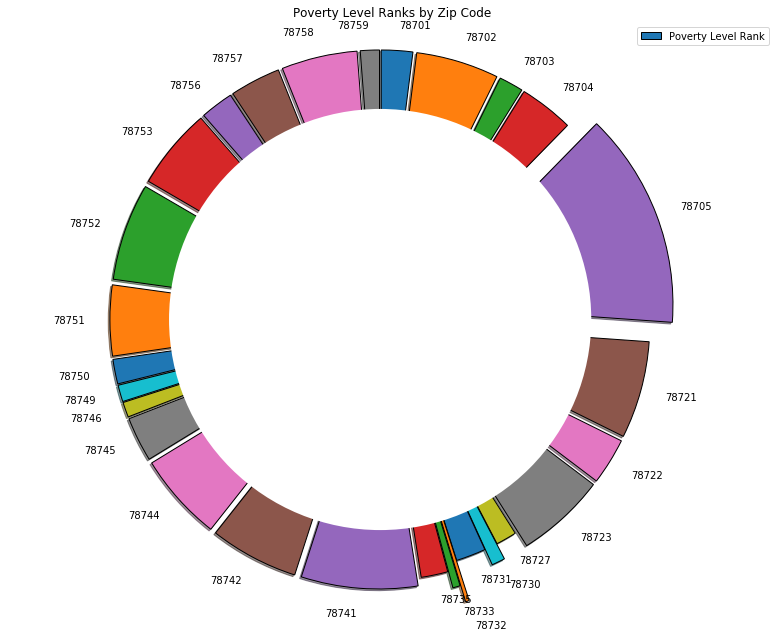

In [57]:
fig, ax = plt.subplots(figsize=(11, 9), subplot_kw=dict(aspect="equal"))
labels = ['Poverty Level Rank']
labels_zip = df_poverty_level['Zip Code']
sizes      = df_poverty_level['HC03_VC171']
explode = (0.2,0.2,0.2,0.2,0.5,0.2,0.2,0.2,0.0,0.2,0.0,0.5,0.3,0.1,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2) 
#Plot
patches, autotexts = ax.pie(sizes,startangle=90,explode=explode, radius=3, labels = labels_zip,
        counterclock=False,shadow = True, wedgeprops = {'linewidth': 1, 'edgecolor': 'black'} )

plt.legend(patches,labels,loc="best")
#Draw circle
for text in texts:
    text.set_color('grey')
for autotext in autotexts:
    autotext.set_color('black')
centre_circle = plt.Circle((0,0),2.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Poverty Level Ranks by Zip Code') 
plt.axis('equal')
plt.tight_layout()
plt.show()

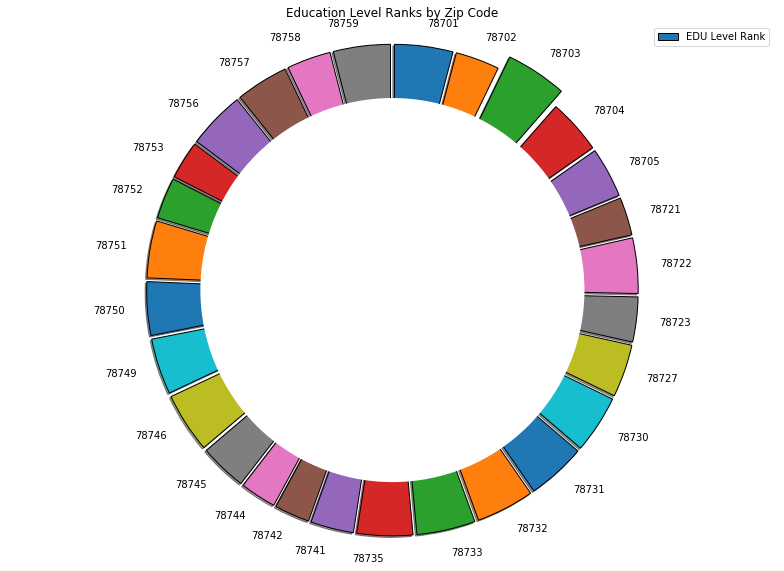

In [69]:
fig, ax = plt.subplots(figsize=(11, 8), subplot_kw=dict(aspect="equal"))
labels = ['EDU Level Rank']
labels_zip = df_edu_level['Zip Code']
sizes      = df_edu_level['EDU Total Score']
explode = (0.2,0.2,0.4,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2) 
#Plot
patches, autotexts = ax.pie(sizes,startangle=90,explode=explode, radius=3, labels = labels_zip,
        counterclock=False,shadow = True, wedgeprops = {'linewidth': 1, 'edgecolor': 'black'} )

plt.legend(patches,labels,loc="best")
#Draw circle
for text in texts:
    text.set_color('grey')
for autotext in autotexts:
    autotext.set_color('black')
centre_circle = plt.Circle((0,0),2.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Education Level Ranks by Zip Code') 
plt.axis('equal')
plt.tight_layout()
plt.show()